In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,distinct, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
#View table details
session.query(Measurement).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fdad88c2a00>,
 'id': 1,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0,
 'prcp': 0.08}

In [10]:
session.query(Station).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fdad5e9cca0>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'elevation': 3.0,
 'latitude': 21.2716,
 'id': 1}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_prior = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year_prior

datetime.date(2016, 8, 23)

In [13]:
# Perform a query to retrieve the date and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
date_prec = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_prior).all()
date_prec_df = pd.DataFrame(date_prec)
date_prec_df = date_prec_df.sort_values(['date'])
date_prec_df.head(2230)

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


In [36]:
dates = date_prec_df['date']
total_dates = len(dates)
print(total_dates)
calendar_year = dates.unique()
len(calendar_year)

2230


366

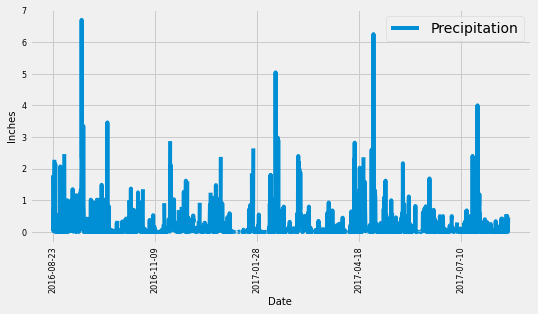

In [43]:
# Use Pandas Plotting with Matplotlib to plot the data
date_prec_df.plot('date','prcp',figsize=(8,4), label = "Precipitation")
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize = 8)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Inches', fontsize = 10)
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Summary_Stats = date_prec_df['prcp'].describe()
Summary_Stats

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [17]:
# Exploratory Station Analysis


In [18]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(distinct(Station.station))).all()
total_stations

[(9)]

In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station).label('measurements'))\
.group_by(Measurement.station).order_by(desc('measurements')).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_popular = "USC00519281"
station_high = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == most_popular).all()
station_low = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == most_popular).all()
station_avg = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_popular).all()

print(f'The station {most_popular} had a high of {station_high[0][0]}, a low of {station_low[0][0]}, and an average temperature of {round(station_avg[0][0],2)}.')

The station USC00519281 had a high of 85.0, a low of 54.0, and an average temperature of 71.66.


In [21]:
start = 2017-8-18
date_high = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.date == start).all()
date_low = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.date == start).all()
date_avg = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.date == start).all()
print(f'High: {date_high}, Low: {date_low}, Avt: {date_avg}.')

High: [(None,)], Low: [(None,)], Avt: [(None,)].


In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_latest_date = session.query(Measurement.date).\
    filter(Measurement.station == most_popular)\
    .order_by(Measurement.date.desc()).first()
station_latest_date

('2017-08-18')

In [23]:
station_one_year_prior = dt.date(2017,8,18) - dt.timedelta(days=365)
station_one_year_prior

datetime.date(2016, 8, 18)

In [24]:
station_temp= session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= station_one_year_prior).all()
station_temp_df = pd.DataFrame(station_temp)
station_temp_df = station_temp_df.sort_values(['date'])
station_temp_df

,date,tobs
0,2016-08-18,80.0
1023,2016-08-18,81.0
1550,2016-08-18,80.0
714,2016-08-18,79.0
1907,2016-08-18,73.0
...,...,...
2259,2017-08-22,76.0
1022,2017-08-23,82.0
1549,2017-08-23,82.0
365,2017-08-23,81.0


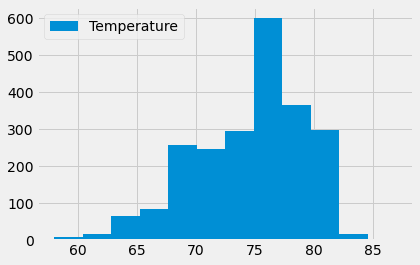

In [25]:
most_popular_histogram = plt.hist(station_temp_df['tobs'], bins=12, label = "Temperature" )
plt.legend(loc='best')
plt.show()

# Close session

In [26]:
# Close Session
session.close()